**OUTLIERS**

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
os.chdir(R"C:\Users\sergi\OneDrive\Documentos\SIR_personal\Python_SDC_HP-i3")

In [3]:
df = pd.read_csv("data_credit.csv",
                sep=",",
                encoding="ISO-8859-1")

In [8]:
df.head()

,duration,chist,reason,camt,telephne,lenemp,instrate,perstat,residlen,prpownr,age,housng,numcred,emptype,numliab,customer
0,6.0,5.0,4.0,1169.0,0.0,4.0,4.0,3.0,4.0,1.0,67.0,2.0,2.0,3.0,1.0,1.0
1,48.0,3.0,4.0,5951.0,1.0,2.0,2.0,2.0,2.0,1.0,22.0,2.0,1.0,3.0,1.0,2.0
2,12.0,5.0,7.0,2096.0,1.0,3.0,2.0,3.0,3.0,1.0,49.0,2.0,1.0,2.0,2.0,1.0
3,42.0,3.0,3.0,7882.0,1.0,3.0,2.0,3.0,4.0,2.0,45.0,3.0,1.0,3.0,2.0,1.0
4,24.0,4.0,1.0,4870.0,1.0,2.0,3.0,3.0,4.0,4.0,53.0,3.0,2.0,3.0,2.0,2.0


In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 

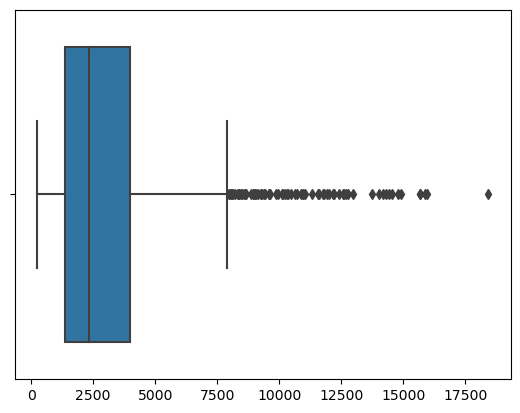

In [7]:
sns.boxplot(x=df.camt.values)
plt.show()

In [9]:
Q1 = df["camt"].quantile(0.25);print(Q1)

1365.5


In [22]:
Q2 = df["camt"].quantile(0.5);print(Q2)

2319.5


In [13]:
Q3 = df["camt"].quantile(0.75);print(Q3)

3972.25


In [24]:
Q3-Q2

1652.75

In [25]:
Q2-Q1

954.0

In [26]:
IQR = Q3-Q1; print(IQR)

2606.75


In [27]:
df.camt.values

array([ 1169.,  5951.,  2096.,  7882.,  4870.,  9055.,  2835.,  6948.,
        3059.,  5234.,  1295.,  4308.,  1567.,  1199.,  1403.,  1282.,
        2424.,  8072., 12579.,  3430.,  2134.,  2647.,  2241.,  1804.,
        2069.,  1374.,   426.,   409.,  2415.,  6836.,  1913.,  4020.,
        5866.,  1264.,  1474.,  4746.,  6110.,  2100.,  1225.,   458.,
        2333.,  1158.,  6204.,  6187.,  6143.,  1393.,  2299.,  1352.,
        7228.,  2073.,  2333.,  5965.,  1262.,  3378.,  2225.,   783.,
        6468.,  9566.,  1961.,  6229.,  1391.,  1537.,  1953., 14421.,
        3181.,  5190.,  2171.,  1007.,  1819.,  2394.,  8133.,   730.,
        1164.,  5954.,  1977.,  1526.,  3965.,  4771.,  9436.,  3832.,
        5943.,  1213.,  1568.,  1755.,  2315.,  1412.,  1295., 12612.,
        2249.,  1108.,   618.,  1409.,   797.,  3617.,  1318., 15945.,
        2012.,  2622.,  2337.,  7057.,  1469.,  2323.,   932.,  1919.,
        2445., 11938.,  6458.,  6078.,  7721.,  1410.,  1449.,   392.,
      

In [28]:
df.camt.values< (Q1-(1.5*IQR))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

LOS VALORES ATIPICOS ARRIBA DEL LIMITE SON

In [30]:
sum(df.camt.values>(Q3+(1.5*IQR)))

72

In [33]:
SELECTION = (df.camt.values>(Q3+(1.5*IQR))) | (df.camt.values< (Q1-(1.5*IQR))             

SyntaxError: unexpected EOF while parsing (2716919856.py, line 2)

**Z score para detección de valores atipicos**

In [34]:
from scipy import stats
import numpy as np 

In [35]:
stats.zscore(df.camt.values)

array([-7.45131413e-01,  9.49816789e-01, -4.16562408e-01,  1.63424694e+00,
        5.66663505e-01,  2.05000901e+00, -1.54628756e-01,  1.30319683e+00,
       -7.52334412e-02,  6.95680892e-01, -7.00471549e-01,  3.67466330e-01,
       -6.04062952e-01, -7.34498112e-01, -6.62191664e-01, -7.05079312e-01,
       -3.00304982e-01,  1.70159118e+00,  3.29906746e+00,  5.62650497e-02,
       -4.03093560e-01, -2.21264110e-01, -3.65168119e-01, -5.20059872e-01,
       -4.26132379e-01, -6.72470522e-01, -1.00848284e+00, -1.01450838e+00,
       -3.03494972e-01,  1.26349917e+00, -4.81425545e-01,  2.65386639e-01,
        9.19689103e-01, -7.11459293e-01, -6.37026185e-01,  5.22712527e-01,
        1.00617329e+00, -4.15144634e-01, -7.25282585e-01, -9.97140651e-01,
       -3.32559329e-01, -7.49030290e-01,  1.03949096e+00,  1.03346543e+00,
        1.01786992e+00, -6.65736098e-01, -3.44610404e-01, -6.80268276e-01,
        1.40244097e+00, -4.24714606e-01, -3.32559329e-01,  9.54778997e-01,
       -7.12168180e-01,  

In [36]:
zscore= np.abs(stats.zscore(df.camt.values))

In [37]:
k=3 #criterio estandar

In [38]:
np.where(zscore>=k)[0]

array([ 18,  63,  87,  95, 105, 236, 272, 274, 373, 374, 378, 381, 395,
       563, 615, 637, 714, 744, 763, 818, 832, 887, 915, 917, 921],
      dtype=int64)

In [39]:
0.5*0.5*0.5

0.125

In [40]:
0.2*0.5*0.3

0.03

In [43]:
(0.3+0.5) * (0.5+0.2) * (0.2+0.3)

0.27999999999999997